## Week 2 homework.
This workbook is the answers for the second week of machine learning zoomcamp

#### load the libaries needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Down the data for the analysis

In [155]:
#!rm labtops.csv
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

#### Load the data using pandas

In [2]:
df = pd.read_csv('laptops.csv')
df.isna().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

#### Basic EDA to examine the data

In [3]:
df.head()

Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        Model            CPU  RAM  Storage Storage type       GPU  Screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  Touch  Final Price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.00  
4    No       669.01

In [4]:
df.describe()

RAM      Storage       Screen  Final Price
count  2160.000000  2160.000000  2156.000000  2160.000000
mean     15.413889   596.294444    15.168112  1312.638509
std       9.867815   361.220506     1.203329   911.475417
min       4.000000     0.000000    10.100000   201.050000
25%       8.000000   256.000000    14.000000   661.082500
50%      16.000000   512.000000    15.600000  1031.945000
75%      16.000000  1000.000000    15.600000  1708.970000
max     128.000000  4000.000000    18.000000  7150.470000

In [5]:
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

####  Rename the columns to be consitence

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

/var/folders/js/95x7pm0d46d9qsgdhmvy56400000gn/T/ipykernel_16161/3671588465.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=5, ax=ax, layout=(3, 3), column=['ram', 'storage','screen','screen','final_price'])


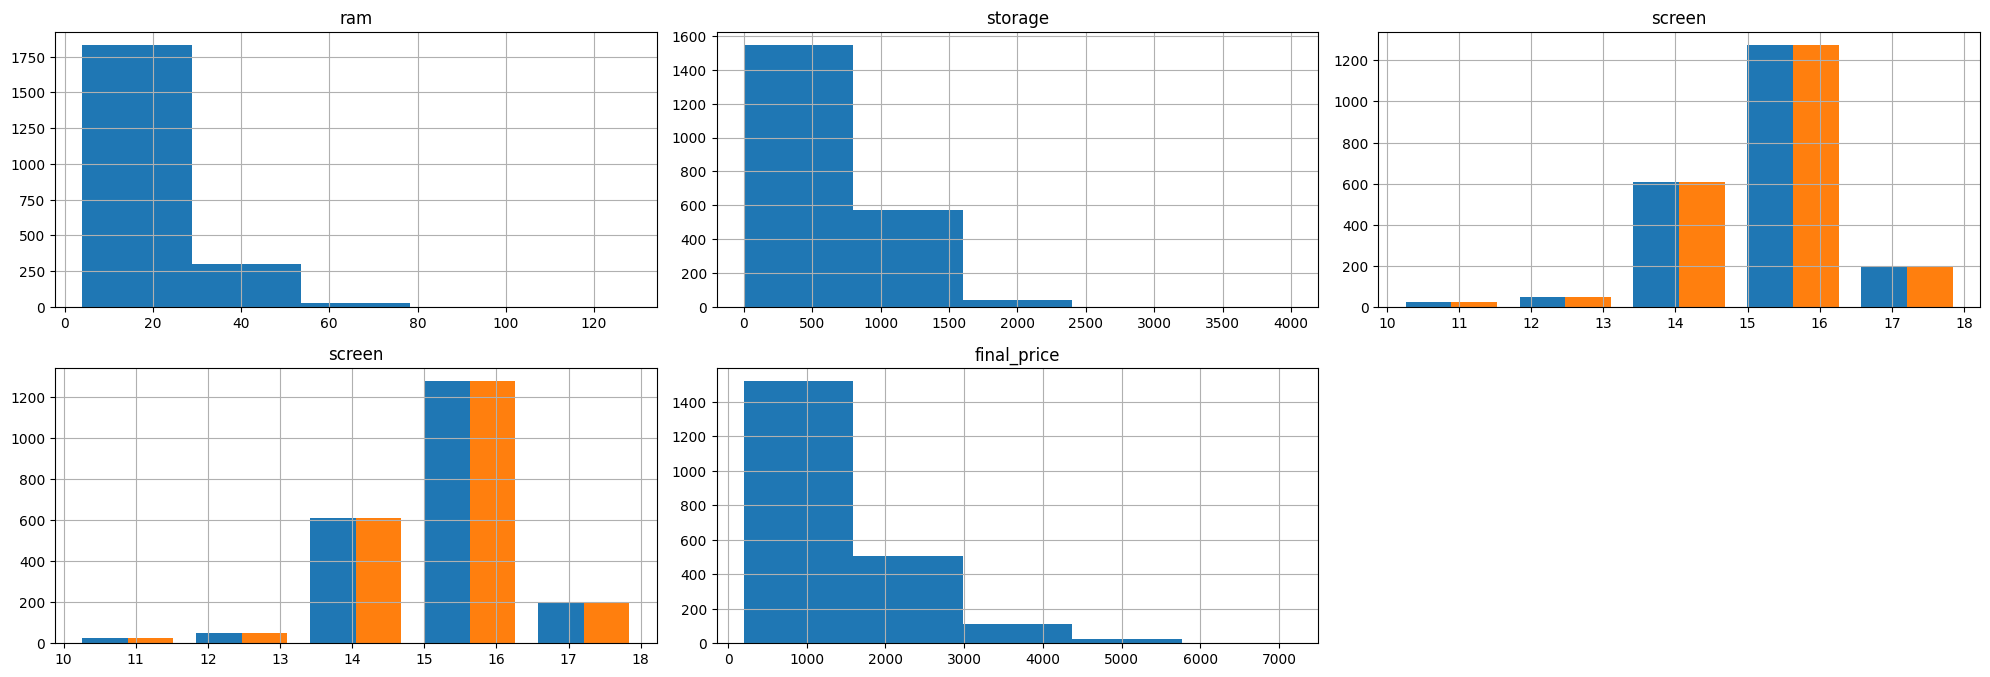

In [113]:
## Plot all the variables
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
df.hist(bins=5, ax=ax, layout=(3, 3), column=['ram', 'storage','screen','screen','final_price'])
plt.tight_layout()
plt.show()

/var/folders/js/95x7pm0d46d9qsgdhmvy56400000gn/T/ipykernel_16161/553747611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.final_price)


<Axes: xlabel='final_price', ylabel='Density'>

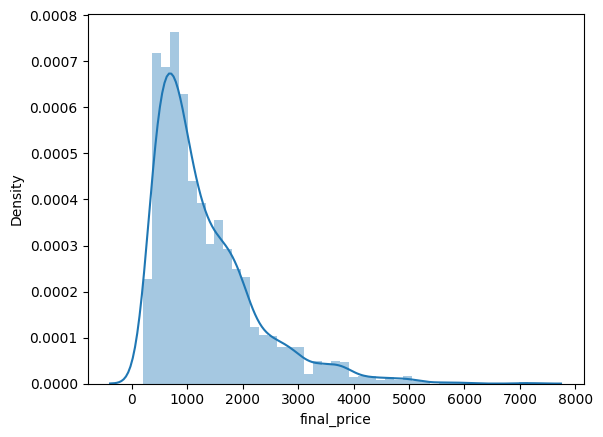

In [69]:
sns.distplot(df.final_price)

#### Subset the columns needed to answer the questions

In [7]:
df_subset = df[['ram', 'storage', 'screen', 'final_price']]
df_subset.columns

Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

In [162]:
df_subset

ram  storage  screen  final_price
0       8      512    15.6      1009.00
1       8      256    15.6       299.00
2       8      256    15.6       789.00
3      16     1000    15.6      1199.00
4      16      512    15.6       669.01
...   ...      ...     ...          ...
2155   16     1000    17.3      2699.99
2156   16     1000    17.3      2899.99
2157   32     1000    17.3      3399.99
2158   16     1000    13.4      1899.99
2159   16      256    13.4      1699.99

[2160 rows x 4 columns]

### Question 1
There's one column with missing values. What is it?

In [8]:
df_subset.isna().sum()[df_subset.isna().sum() > 0].index[0]

'screen'

### Question 2
What's the median (50% percentile) for variable 'ram'?

In [9]:
df_subset.ram.quantile(0.5)

16.0

In [10]:
df_subset.ram.median()

16.0

### Prepare and split the dataset

In [11]:
## Set random seeds for spliting the data
n = len(df_subset)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val


idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


print(n, n_train + n_test + n_val, n_train, n_test, n_val)

2160 2160 1296 432 432


In [12]:
df_subset = df_subset.iloc[idx]

df_train = df_subset.iloc[:n_train].copy()
df_val = df_subset.iloc[n_train : n_train + n_val].copy()
df_test = df_subset.iloc[n_train + n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [13]:
y_train = df_train.final_price.values
y_test = df_test.final_price.values
y_val = df_val.final_price.values


del df_train["final_price"]
del df_test["final_price"]
del df_val["final_price"]

In [14]:
df_test

ram  storage  screen
0     32     1000    15.6
1     16      512    13.0
2     16      512    15.6
3     16      512    15.0
4     16     1000    15.6
..   ...      ...     ...
427    8      512    15.0
428    8      256    15.6
429    8      256    13.3
430    8      512    14.0
431   32     1000    16.0

[432 rows x 3 columns]

### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

#### 3.1 Filling the missing value

- Write the functions to fill in the missing values, prepare the data
- Write the funcutions needed for the regression and RMSE

In [15]:
def prepare_X(df, fillna_value):
    df = df.copy()
    df = df.fillna(fillna_value)
    X = df.values
    return X


def rmse(y, y_pred):
    se = (( y - y_pred) ** 2).mean()
    return np.sqrt(se)
    
    
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


#### 3.2 Test mean first

Fill the NAs with the mean and calculate the RMSE

In [16]:
mean_price = df_train.screen.mean()

X_train_zero = prepare_X(df_train, mean_price)
w_0, w = train_linear_regression(X_train_zero, y_train)


X_val_zero = prepare_X(df_val, fillna_value=mean_price)
y_pred_zero = w_0 + X_val_zero.dot(w)

round(rmse(y_val, y_pred_zero),2)

600.27

#### 3.3 Test with zero

In [17]:
X_train = prepare_X(df_train, 0)


w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

round(rmse(y_val, y_pred),2)

597.36

### Question 4 Regularisation

- Regularisation of the model with different r values
    - Update the regression function to add in r (regularisation value)

In [18]:
def train_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX= XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [19]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
min_value = 100000
min_r = ''
rsme_val_list = []
for r in r_values:
    w_0, w = train_linear_regression(X_train, y_train, r=r)
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    rsme_value = round(rmse(y_val, y_pred),2)
    rsme_val_list.append(rsme_value)
    
    if rsme_value < min_value:
        min_value = rsme_value
        min_r = str(r)

    print("RSME value: {0:10} is {1}".format(r, rsme_value))


print("The best r value is: {0:5} with rsme of {1}".format(min_r, min_value))

RSME value:          0 is 597.36
RSME value:      1e-06 is 597.36
RSME value:     0.0001 is 597.36
RSME value:      0.001 is 597.36
RSME value:       0.01 is 597.36
RSME value:        0.1 is 597.35
RSME value:          1 is 597.21
RSME value:          5 is 597.01
RSME value:         10 is 597.06
The best r value is: 5     with rsme of 597.01


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

#### Compile all the code above and write a loop to perform the analsyis

In [34]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rsme_values = []
for seed in seed_values:
    n = len(df_subset)
    
    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - (n_test + n_val)

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df_subset.iloc[idx[:n_train]]
    df_val = df_subset.iloc[idx[n_train:n_train + n_val]]
    df_test = df_subset.iloc[idx[n_train + n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_test = df_test.final_price.values
    y_val = df_val.final_price.values
    
    
    del df_train["final_price"]
    del df_test["final_price"]
    del df_val["final_price"]
    
    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    
    rsme_value = rmse(y_val, y_pred)
    rsme_values.append(round(rsme_value, 2))
    print("RSME value for seed of {0} is {1}".format(seed, round(rsme_value, 2)))


print(round(np.std(rsme_values), 3))


RSME value for seed of 0 is 650.09
RSME value for seed of 1 is 593.15
RSME value for seed of 2 is 573.0
RSME value for seed of 3 is 535.81
RSME value for seed of 4 is 619.89
RSME value for seed of 5 is 548.8
RSME value for seed of 6 is 635.02
RSME value for seed of 7 is 578.32
RSME value for seed of 8 is 583.1
RSME value for seed of 9 is 549.81
36.269


### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

#### split the dataset into  train, test and validations and then combine the train and validate

In [27]:
np.random.seed(9)
n = len(df_subset)
idx = np.arange(n)
np.random.shuffle(idx)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

df_train = df_subset.iloc[idx[:n_train]]
df_val = df_subset.iloc[idx[n_train:n_train + n_val]]
df_test = df_subset.iloc[idx[n_train + n_val:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.final_price.values
y_test = df_test.final_price.values
y_val = df_val.final_price.values


del df_train["final_price"]
del df_test["final_price"]
del df_val["final_price"]


f = [df_train, df_val]
combine_train_val = pd.concat(f)

y_train_val = np.concatenate((y_train, y_val))

#### used the split data for training and validation

In [28]:
def train_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX= XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [29]:
X_train = prepare_X(df_train, 0)
    
    
w_0, w = train_linear_regression(X_train, y_train, r=0.001)

X_val = prepare_X(combine_train_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)


round(rmse(y_train_val, y_pred),2)



586.53